# Token annotation overlaps

## Read mapping information

In [8]:
import os

import pandas as pd


demoTrainDf = pd.read_csv(os.environ['EHR_DATA_BASE'] + '/blood_pos_cohort_20240614/data/wb_365_wa_1/splits_v1/demographics/mortality_normal_train.csv', sep='\t')
demoTestDf = pd.read_csv(os.environ['EHR_DATA_BASE'] + '/blood_pos_cohort_20240614/data/wb_365_wa_1/splits_v1/demographics/mortality_normal_test.csv', sep='\t')
demoValidateDf = pd.read_csv(os.environ['EHR_DATA_BASE'] + '/blood_pos_cohort_20240614/data/wb_365_wa_1/splits_v1/demographics/mortality_normal_validate.csv', sep='\t')
demoDf = pd.concat([demoTrainDf, demoTestDf, demoValidateDf], ignore_index=True)
demoDf

,person_id,visit_occurrence_id,TYPE,COUNTRY_OF_BIRTH,SEX,Age_Bin,JOURNEY_ID
0,678487,3312694,Emergency,Australia,Male,"(60, 70]",3312694
1,2094045,9199249,Emergency,Australia,Male,"(20, 30]",9199249
2,2107813,9410987,Emergency,Australia,Male,"(50, 60]",9410987
3,2083212,602890,Inpatient,Australia,Female,"(40, 50]",9039437
4,2083212,9039437,Emergency,Australia,Female,"(40, 50]",9039437
...,...,...,...,...,...,...,...
7194,2603535,16588204,Inpatient,Australia,Male,"(60, 70]",16588204
7195,2603535,16709341,Inpatient,Australia,Male,"(60, 70]",16709341
7196,2603535,16651755,Inpatient,Australia,Male,"(60, 70]",16651755
7197,2098616,16872774,Emergency,Australia,Female,"(80, 90]",16872774


In [9]:
import os

mappingDf = pd.read_csv(os.environ['GENOMICS_DATA_BASE'] + '/patient_tube_id_mapping_full.tsv', sep='\t')
mappingDf

,tube_code,PATIENT_ID,db_ID,pt_age,pt_gender,EPISODE_ID,hospital_admission,hospital_discharge,hospital_in_last_year,genome_species,species_reported,contig_number,length,tube_code_duplicate_or_old,date_of_collection,ID_number,location_additional_02,collected_from_original
0,AH19J072,213972.0,3JNQS,64,Male,12931474.0,2019-10-17,2019-11-29,yes,Escherichia coli,Escherichia coli,92,5131021,NaN,2019-10-30,19-303-0997,A-7EA;HAEM,Blood
1,AH19J074,213972.0,3JNQS,64,Male,12931474.0,2019-10-17,2019-11-29,yes,Streptococcus sp. D19,Streptococcus mitis group,84,2022991,NaN,2019-10-30,19-303-1174,A-7EA;HAEM,Blood Peripheral
2,AH19B003,526238.0,567AE,85,Male,640261.0,2019-02-04,2019-02-07,no,Escherichia coli,Escherichia coli,93,4942915,NaN,2019-02-03,19-034-1596,A-4WB;GMC,Blood
3,AH20A024,788941.0,3YBDS,58,Female,13194824.0,2020-01-16,2020-01-19,no,Escherichia coli,Escherichia coli,110,5149157,NaN,2020-01-16,20-016-2112,S-ED;Emergency,Blood Venous
4,AH20L041,1023735.0,2VJ78,42,Male,14210147.0,2020-12-18,2021-01-05,yes,Staphylococcus aureus,Staphylococcus aureus,46,2735216,NaN,2020-12-16,20-351-2856,Emergency Dept;nan,Blood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3112,ALF22L076,639020.0,3S6HL,84,Male,17219899.0,2022-12-15,2022-12-20,yes,Streptococcus vestibularis,Streptococcus salivarius group,107,1938627,NaN,2022-12-15,22-349-2150,Ward 4WB,Blood Peripheral
3113,ALF22L089,655404.0,6EWBM,67,Female,NaN,NaN,NaN,NaN,Proteus columbae,Proteus vulgaris,152,3972219,NaN,2022-12-17,22-351-1465,Comm/Amb Clinic,Blood
3114,ALF22L138,2572048.0,YM5PJ,61,Male,NaN,NaN,NaN,NaN,Enterobacter roggenkampii,Enterobacter cloacae complex,66,4876179,NaN,2022-12-27,22-361-0202,Ward 7 East,Hick White Lum
3115,ALF23A102,2054964.0,5DYAH,35,Female,17294287.0,2023-01-12,2023-02-01,yes,Streptococcus constellatus,Streptococcus anginosus group,54,1869828,NaN,2023-01-11,23-011-3305,ICU,Blood Venous


In [10]:
mappedJourneyTubeIdsDf = mappingDf[['tube_code', 'PATIENT_ID', 'EPISODE_ID']].drop_duplicates().merge(
    demoDf[['person_id', 'visit_occurrence_id', 'JOURNEY_ID']],
    how='inner',
    left_on=['PATIENT_ID', 'EPISODE_ID'],
    right_on=['person_id', 'visit_occurrence_id']
).drop(
    columns=['PATIENT_ID', 'EPISODE_ID', 'visit_occurrence_id']
)[['person_id', 'JOURNEY_ID', 'tube_code']].drop_duplicates()
mappedJourneyTubeIdsDf

,person_id,JOURNEY_ID,tube_code
0,50056,13224842,AH20B011
1,62567,12645629,AH19G065
2,138108,14737781,AH21E052
3,211314,13955099,AH20J009
4,211314,13955099,KPN2214
...,...,...,...
512,2084373,16158768,ALF22C004
513,1058066,16759482,ALF22H089
514,2552781,16966609,ALF22J054
515,2638484,16969999,ALF22K143


## Read bed files containing overlapping tokens and attribution scores

In [11]:
import os
import pandas as pd
from pathlib import Path


overlappingFilesDir = Path(os.environ['GENOMICS_DATA_BASE'], 'genome_nlp_tokens', 'overlapping_with_annotations', 'SAUR')

overlappingDfList = []
for overlappingFile in os.listdir(overlappingFilesDir):
    df = pd.read_csv(Path(overlappingFilesDir, overlappingFile), sep='\t', names=['contig_id', 'start_position', 'end_position', 'tokens', 'score', 'feature_type', 'id', 'name', 'gene', 'atributes'])
    df['tube_code'] = [overlappingFile.split('_')[0]]*df.shape[0]
    overlappingDfList.append(df)
overlappingDf = pd.concat(overlappingDfList, ignore_index=True)
overlappingDf = overlappingDf.merge(
    mappedJourneyTubeIdsDf,
    how='inner',
    on=['tube_code']
)
overlappingDf = overlappingDf.drop_duplicates()
overlappingDf = overlappingDf[overlappingDf.tokens.apply(lambda x: (len(x) >= 5))].reset_index()
overlappingDf['gene'] = overlappingDf.gene.str.lower()
overlappingDf = overlappingDf[overlappingDf.feature_type.isin(['CDS', 'ncRNA', 'oriC', 'regulatory_region', 'oriT'])]
overlappingDf

/tmp/ipykernel_34876/3411774244.py:10: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(Path(overlappingFilesDir, overlappingFile), sep='\t', names=['contig_id', 'start_position', 'end_position', 'tokens', 'score', 'feature_type', 'id', 'name', 'gene', 'atributes'])
/tmp/ipykernel_34876/3411774244.py:10: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(Path(overlappingFilesDir, overlappingFile), sep='\t', names=['contig_id', 'start_position', 'end_position', 'tokens', 'score', 'feature_type', 'id', 'name', 'gene', 'atributes'])
/tmp/ipykernel_34876/3411774244.py:10: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(Path(overlappingFilesDir, overlappingFile), sep='\t', names=['contig_id', 'start_position', 'end_position', 'tokens', 'score', 'feature_type', 'id', 'name', 'gene', 'at

,index,contig_id,start_position,end_position,tokens,score,feature_type,id,name,gene,atributes,tube_code,person_id,JOURNEY_ID
0,1,1,193,197,ATAAC,-0.000873,CDS,CFBAKF_00005,DUF3969 domain-containing protein,NaN,ID=CFBAKF_00005;Name=DUF3969 domain-containing...,AH19E065,2221447,681015
1,4,1,204,210,ATTGATT,-0.000882,CDS,CFBAKF_00005,DUF3969 domain-containing protein,NaN,ID=CFBAKF_00005;Name=DUF3969 domain-containing...,AH19E065,2221447,681015
2,5,1,211,218,AATATTTT,0.000624,CDS,CFBAKF_00005,DUF3969 domain-containing protein,NaN,ID=CFBAKF_00005;Name=DUF3969 domain-containing...,AH19E065,2221447,681015
3,6,1,219,225,GTCATTG,-0.001691,CDS,CFBAKF_00005,DUF3969 domain-containing protein,NaN,ID=CFBAKF_00005;Name=DUF3969 domain-containing...,AH19E065,2221447,681015
4,7,1,226,233,AATTCTAC,-0.000970,CDS,CFBAKF_00005,DUF3969 domain-containing protein,NaN,ID=CFBAKF_00005;Name=DUF3969 domain-containing...,AH19E065,2221447,681015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15277499,18859790,5,205763,205769,ATGATAT,0.002546,CDS,KKIOAG_10525,Prepilin signal peptidase PulO (type II secret...,pulo,ID=KKIOAG_10525;Name=Prepilin signal peptidase...,AH21K020,2035444,15586881
15277500,18859791,5,205770,205775,CCATCA,0.000022,CDS,KKIOAG_10525,Prepilin signal peptidase PulO (type II secret...,pulo,ID=KKIOAG_10525;Name=Prepilin signal peptidase...,AH21K020,2035444,15586881
15277501,18859792,5,205776,205781,ATTTTT,-0.002056,CDS,KKIOAG_10525,Prepilin signal peptidase PulO (type II secret...,pulo,ID=KKIOAG_10525;Name=Prepilin signal peptidase...,AH21K020,2035444,15586881
15277502,18859793,5,205782,205787,AGGAGG,0.000008,CDS,KKIOAG_10525,Prepilin signal peptidase PulO (type II secret...,pulo,ID=KKIOAG_10525;Name=Prepilin signal peptidase...,AH21K020,2035444,15586881


## All Overlap analysis

### Feature type wise overlapping counts

In [24]:
overlappingDf.feature_type.value_counts()

feature_type
CDS                  15143265
ncRNA                   93147
regulatory_region       25145
oriC                     7349
oriT                       22
Name: count, dtype: int64

<Axes: xlabel='feature_type'>

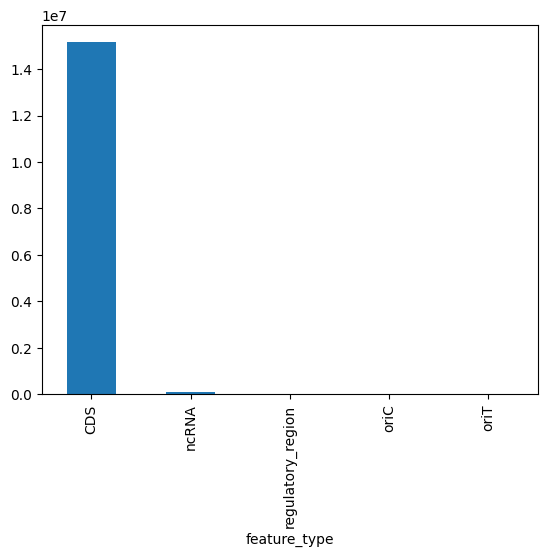

In [13]:
overlappingDf.feature_type.value_counts().plot(kind = 'bar')

### Top genes

#### Overall

In [14]:
overlappingDf

,index,contig_id,start_position,end_position,tokens,score,feature_type,id,name,gene,atributes,tube_code,person_id,JOURNEY_ID
0,1,1,193,197,ATAAC,-0.000873,CDS,CFBAKF_00005,DUF3969 domain-containing protein,NaN,ID=CFBAKF_00005;Name=DUF3969 domain-containing...,AH19E065,2221447,681015
1,4,1,204,210,ATTGATT,-0.000882,CDS,CFBAKF_00005,DUF3969 domain-containing protein,NaN,ID=CFBAKF_00005;Name=DUF3969 domain-containing...,AH19E065,2221447,681015
2,5,1,211,218,AATATTTT,0.000624,CDS,CFBAKF_00005,DUF3969 domain-containing protein,NaN,ID=CFBAKF_00005;Name=DUF3969 domain-containing...,AH19E065,2221447,681015
3,6,1,219,225,GTCATTG,-0.001691,CDS,CFBAKF_00005,DUF3969 domain-containing protein,NaN,ID=CFBAKF_00005;Name=DUF3969 domain-containing...,AH19E065,2221447,681015
4,7,1,226,233,AATTCTAC,-0.000970,CDS,CFBAKF_00005,DUF3969 domain-containing protein,NaN,ID=CFBAKF_00005;Name=DUF3969 domain-containing...,AH19E065,2221447,681015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15277499,18859790,5,205763,205769,ATGATAT,0.002546,CDS,KKIOAG_10525,Prepilin signal peptidase PulO (type II secret...,pulo,ID=KKIOAG_10525;Name=Prepilin signal peptidase...,AH21K020,2035444,15586881
15277500,18859791,5,205770,205775,CCATCA,0.000022,CDS,KKIOAG_10525,Prepilin signal peptidase PulO (type II secret...,pulo,ID=KKIOAG_10525;Name=Prepilin signal peptidase...,AH21K020,2035444,15586881
15277501,18859792,5,205776,205781,ATTTTT,-0.002056,CDS,KKIOAG_10525,Prepilin signal peptidase PulO (type II secret...,pulo,ID=KKIOAG_10525;Name=Prepilin signal peptidase...,AH21K020,2035444,15586881
15277502,18859793,5,205782,205787,AGGAGG,0.000008,CDS,KKIOAG_10525,Prepilin signal peptidase PulO (type II secret...,pulo,ID=KKIOAG_10525;Name=Prepilin signal peptidase...,AH21K020,2035444,15586881


In [15]:
overlappingDf[['name', 'gene', 'index']].groupby(by=['name', 'gene']).agg('count').reset_index().rename(columns={'index': 'total_count'}).sort_values(by=['total_count'], ascending=False)[:10]

,name,gene,total_count
1160,Thioester reductase domain of alpha aminoadipa...,lys2b,66217
1800,putative arabinose efflux permease AraJ%2C MFS...,araj,59126
1065,Serine transporter YbeC%2C amino acid:H+ sympo...,pote,56878
1098,Staphylococcus sRNA 35 (srn_0335),s35,44085
1174,Transcriptional antiterminator,bglg,43515
523,Extracellular matrix-binding protein ebh,ebh,41067
686,LPXTG-anchored repetitive surface protein SasC,sasc,39174
183,ABC-type multidrug transport system%2C ATPase ...,mdlb,37685
914,Phosphotransferase system mannitol/fructose-sp...,ptsn,35555
272,AraC-type DNA-binding domain and AraC-containi...,arac,35041


In [16]:
overlappingDf.name.value_counts().reset_index()[:10]

,name,count
0,hyperosmolarity resistance protein Ebh,120140
1,Thioester reductase domain of alpha aminoadipa...,66217
2,Lipoprotein,65848
3,putative arabinose efflux permease AraJ%2C MFS...,60327
4,Serine transporter YbeC%2C amino acid:H+ sympo...,56878
5,Extracellular matrix-binding protein ebh,54739
6,Phage protein,50389
7,ABC-type dipeptide/oligopeptide/nickel transpo...,48953
8,Phosphotransferase system IIB components,45027
9,Staphylococcus sRNA 35 (srn_0335),44085


In [17]:
overlappingDf.gene.value_counts()[:10]

gene
lys2b    66217
araj     59126
pote     56878
ccma     50865
ebh      45687
ftsk     45510
bglg     44198
s35      44190
fepd     42048
mdlb     41789
Name: count, dtype: int64

#### CDS

In [18]:
overlappingDf[overlappingDf.feature_type == 'CDS'][['name', 'gene', 'index']].groupby(by=['name', 'gene']).agg('count').reset_index().rename(columns={'index': 'total_count'}).sort_values(by=['total_count'], ascending=False)[:10]

,name,gene,total_count
1109,Thioester reductase domain of alpha aminoadipa...,lys2b,66217
1748,putative arabinose efflux permease AraJ%2C MFS...,araj,59126
1036,Serine transporter YbeC%2C amino acid:H+ sympo...,pote,56878
1123,Transcriptional antiterminator,bglg,43515
514,Extracellular matrix-binding protein ebh,ebh,41067
676,LPXTG-anchored repetitive surface protein SasC,sasc,39174
177,ABC-type multidrug transport system%2C ATPase ...,mdlb,37685
902,Phosphotransferase system mannitol/fructose-sp...,ptsn,35555
266,AraC-type DNA-binding domain and AraC-containi...,arac,35041
21,2'%2C3'-cyclic-nucleotide 2'-phosphodiesterase...,usha,34717


In [19]:
overlappingDf[overlappingDf.feature_type == 'CDS'].name.value_counts().reset_index()[:10]

,name,count
0,hyperosmolarity resistance protein Ebh,120140
1,Thioester reductase domain of alpha aminoadipa...,66217
2,Lipoprotein,65848
3,putative arabinose efflux permease AraJ%2C MFS...,60327
4,Serine transporter YbeC%2C amino acid:H+ sympo...,56878
5,Extracellular matrix-binding protein ebh,54739
6,Phage protein,50389
7,ABC-type dipeptide/oligopeptide/nickel transpo...,48953
8,Phosphotransferase system IIB components,45027
9,Transcriptional antiterminator,43515


In [20]:
overlappingDf[overlappingDf.feature_type == 'CDS'].gene.value_counts().reset_index()[:10]

,gene,count
0,lys2b,66217
1,araj,59126
2,pote,56878
3,ccma,50865
4,ebh,45687
5,ftsk,45510
6,bglg,44198
7,fepd,42048
8,mdlb,41789
9,era,39383


#### LncRNA

In [21]:
overlappingDf[overlappingDf.feature_type == 'ncRNA'][['name', 'gene', 'index']].groupby(by=['name', 'gene']).agg('count').reset_index().rename(columns={'index': 'total_count'}).sort_values(by=['total_count'], ascending=False)[:10]

,name,gene,total_count
32,Staphylococcus sRNA 35 (srn_0335),s35,44085
23,S. aureus tsr24 small RNA,tsr24,7279
6,Bacterial RNase P class B,rnasep_bact_b,3222
16,RNA Staph. aureus C,rsac,3216
22,S. aureus Teg23 small RNA,teg23,2400
15,RNA Staph. aureus A,rsaj,2280
10,Listeria sRNA rli28,rli28,1910
42,Staphylococcus sRNA sau-53,sau-53,1693
4,5' ureB small RNA,5_ureb_srna,1618
5,6S / SsrS RNA,6s,1556


In [22]:
overlappingDf[overlappingDf.feature_type == 'ncRNA'].name.value_counts().reset_index()[:10]

,name,count
0,Staphylococcus sRNA 35 (srn_0335),44085
1,S. aureus tsr24 small RNA,7279
2,RNA Staph. aureus A,3473
3,Bacterial RNase P class B,3222
4,RNA Staph. aureus C,3216
5,S. aureus Teg23 small RNA,2400
6,Listeria sRNA rli28,1910
7,Staphylococcus sRNA sau-53,1693
8,5' ureB small RNA,1618
9,6S / SsrS RNA,1556


In [23]:
overlappingDf[overlappingDf.feature_type == 'ncRNA'].gene.value_counts().reset_index()[:10]

,gene,count
0,s35,44190
1,tsr24,7304
2,rnasep_bact_b,3222
3,rsac,3216
4,teg23,2456
5,rsaj,2280
6,rli28,1910
7,sau-53,1693
8,5_ureb_srna,1618
9,6s,1556


## High-score overlap analysis

### Obtain high-score cutoff

In [25]:
highscoreCutoff = overlappingDf.score.mean() + 2 * overlappingDf.score.std()
highscoreCutoff

np.float64(0.007741571569528614)

### Create overlaps dataframe for high-score genes

In [26]:
highscoreOverlappingDf = overlappingDf[overlappingDf.score > highscoreCutoff]
highscoreOverlappingDf

,index,contig_id,start_position,end_position,tokens,score,feature_type,id,name,gene,atributes,tube_code,person_id,JOURNEY_ID
2952,3660,1,25083,25088,CATACA,0.008711,CDS,CFBAKF_00145,Uncharacterized NAD(P)/FAD-binding protein YdhS,ydhs,ID=CFBAKF_00145;Name=Uncharacterized NAD(P)/FA...,AH19E065,2221447,681015
2984,3698,1,25285,25290,CAATAA,0.017434,CDS,CFBAKF_00145,Uncharacterized NAD(P)/FAD-binding protein YdhS,ydhs,ID=CFBAKF_00145;Name=Uncharacterized NAD(P)/FA...,AH19E065,2221447,681015
2995,3711,1,25573,25579,TGTTTCA,0.009413,regulatory_region,CFBAKFGJGG_130,FMN riboswitch (RFN element),NaN,ID=CFBAKFGJGG_130;Name=FMN riboswitch (RFN ele...,AH19E065,2221447,681015
3040,3764,1,25998,26003,TTGGTT,0.013042,CDS,CFBAKF_00150,bifunctional diaminohydroxyphosphoribosylamino...,ribd,ID=CFBAKF_00150;Name=bifunctional diaminohydro...,AH19E065,2221447,681015
3056,3785,1,26109,26113,ATCAC,0.009841,CDS,CFBAKF_00150,bifunctional diaminohydroxyphosphoribosylamino...,ribd,ID=CFBAKF_00150;Name=bifunctional diaminohydro...,AH19E065,2221447,681015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15273351,18854693,5,174633,174638,AAATAT,0.016582,CDS,KKIOAG_10390,DNA polymerase I,pola,ID=KKIOAG_10390;Name=DNA polymerase I;locus_ta...,AH21K020,2035444,15586881
15274746,18856411,5,185117,185122,ATAAAT,0.013418,CDS,KKIOAG_10430,Amino acid permease,lysp,ID=KKIOAG_10430;Name=Amino acid permease;locus...,AH21K020,2035444,15586881
15274751,18856416,5,185147,185153,TGTTTCC,0.009235,CDS,KKIOAG_10430,Amino acid permease,lysp,ID=KKIOAG_10430;Name=Amino acid permease;locus...,AH21K020,2035444,15586881
15274880,18856595,5,186231,186237,AATTAAA,0.011731,CDS,KKIOAG_10440,50S ribosomal protein L35,rpmi,ID=KKIOAG_10440;Name=50S ribosomal protein L35...,AH21K020,2035444,15586881


In [27]:
len(highscoreOverlappingDf[highscoreOverlappingDf.feature_type == 'CDS'].gene.unique())

1550

### Top genes

In [28]:
highscoreOverlappingDf[['tokens', 'name', 'gene']].drop_duplicates().groupby(by=['name', 'gene']).agg('count').reset_index().rename(columns={'tokens': 'total_count'}).sort_values(by=['total_count'], ascending=False)[:10]

,name,gene,total_count
857,Serine transporter YbeC%2C amino acid:H+ sympo...,pote,149
671,NhaP-type Na+/H+ or K+/H+ antiporter,nhap,117
165,ABC-type multidrug transport system%2C ATPase ...,mdlb,109
923,Thioester reductase domain of alpha aminoadipa...,lys2b,109
494,Glycosyltransferase involved in cell wall bisy...,rfab,105
283,Choline-glycine betaine transporter,bett,104
658,Na+/H+ antiporter Mnh2 subunit A,mnha2,100
347,DNA topoisomerase IV subunit A,parc,99
1300,isoleucine--tRNA ligase,iles,93
345,DNA segregation ATPase FtsK/SpoIIIE or related...,ftsk,92


#### CDS

In [29]:
cdsOverlapsDf = highscoreOverlappingDf[highscoreOverlappingDf.feature_type == 'CDS'][['tokens', 'name', 'gene']].drop_duplicates().groupby(by=['name', 'gene']).agg('count').reset_index().rename(columns={'tokens': 'total_count'}).sort_values(by=['total_count'], ascending=False)
cdsOverlapsDf[:10]

,name,gene,total_count
835,Serine transporter YbeC%2C amino acid:H+ sympo...,pote,149
664,NhaP-type Na+/H+ or K+/H+ antiporter,nhap,117
891,Thioester reductase domain of alpha aminoadipa...,lys2b,109
162,ABC-type multidrug transport system%2C ATPase ...,mdlb,109
488,Glycosyltransferase involved in cell wall bisy...,rfab,105
278,Choline-glycine betaine transporter,bett,104
651,Na+/H+ antiporter Mnh2 subunit A,mnha2,100
342,DNA topoisomerase IV subunit A,parc,99
1268,isoleucine--tRNA ligase,iles,93
340,DNA segregation ATPase FtsK/SpoIIIE or related...,ftsk,92


In [30]:
cdsOverlapsDf[['name', 'gene']].drop_duplicates().shape

(1662, 2)

In [31]:
len(cdsOverlapsDf.gene.unique())

1549

In [32]:
import os
from pathlib import Path


cdsOverlapsFile = Path(os.environ['GENOMICS_DATA_BASE'], 'genome_nlp_tokens', 'overlap_analysis', 'SAUR', 'cds_token_overlaps.csv')

cdsOverlapsDf.to_csv(cdsOverlapsFile, index=False)

#### ncRNA

In [33]:
ncrnaOverlapsDf = highscoreOverlappingDf[highscoreOverlappingDf.feature_type == 'ncRNA'][['tokens', 'name', 'gene']].drop_duplicates().groupby(by=['name', 'gene']).agg('count').reset_index().rename(columns={'tokens': 'total_count'}).sort_values(by=['total_count'], ascending=False)
ncrnaOverlapsDf[:20]

,name,gene,total_count
23,Staphylococcus sRNA 35 (srn_0335),s35,81
17,S. aureus tsr24 small RNA,tsr24,20
11,RNA Staph. aureus C,rsac,19
16,S. aureus Teg23 small RNA,teg23,15
24,Staphylococcus sRNA 414,s414,7
3,Bacterial RNase P class B,rnasep_bact_b,7
28,Staphylococcus sRNA sau-30,sau-30,7
14,RNA Staph. aureus F,rsaf,6
12,RNA Staph. aureus D,rsad,6
13,RNA Staph. aureus E (RoxS),rsae,6


In [34]:
import os
from pathlib import Path


ncrnaOverlapsFile = Path(os.environ['GENOMICS_DATA_BASE'], 'genome_nlp_tokens', 'overlap_analysis', 'SAUR', 'ncrna_token_overlaps.csv')

ncrnaOverlapsDf.to_csv(ncrnaOverlapsFile, index=False)